In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
import pickle
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
with open('../saved_models/model.pkl', 'rb') as f:
            model = pickle.load(f)

with open('../saved_models/model_lstm.pkl', 'rb') as f:
            model_lstm = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-05-23 21:28:44         4213
metadata.json                                  2023-05-23 21:28:44           64
variables.h5                                   2023-05-23 21:28:44      4721480


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv1d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......embedding
.........vars
............0
......flatten
.........vars
......max_pooling1d
.........vars
......max_pooling1d_1
.........vars
......max_pooling1d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-

In [3]:
df = pd.read_csv('articles.csv')
texts = df['title'].tolist()
labels = df['category'].tolist()
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
with open('../saved_tokenizer/tokenizer.json', 'wb') as f:
    pickle.dump(tokenizer, f)

max_length = 250
data = pad_sequences(sequences, maxlen=max_length)

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded, num_classes=48)

label_names = le.classes_

In [4]:
# Classes de teste do CNN
X_train, X_test, y_train, y_test = train_test_split(data, labels_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_prob = model.predict(X_test)
y_pred_modelo1 = model.predict(X_test)
y_pred_modelo2 = model_lstm.predict(X_test)
num_classes = 48

1045/1045 [==============================] - 43s 41ms/step


In [5]:
from sklearn.metrics import jaccard_score, f1_score

# Converter as previsões em rótulos preditos binarizados
y_pred_modelo1_bin = (y_pred_modelo1 > 0.5).astype(int)
y_pred_modelo2_bin = (y_pred_modelo2 > 0.5).astype(int)

# Calcular o índice de similaridade de Jaccard para cada modelo
jaccard_modelo1 = jaccard_score(y_test, y_pred_modelo1_bin, average='samples')
jaccard_modelo2 = jaccard_score(y_test, y_pred_modelo2_bin, average='samples')

# Calcular o F1-score para cada modelo
f1_score_modelo1 = f1_score(y_test, y_pred_modelo1_bin, average='samples')
f1_score_modelo2 = f1_score(y_test, y_pred_modelo2_bin, average='samples')

print('Índice de Jaccard - Modelo 1:', jaccard_modelo1)
print('Índice de Jaccard - Modelo 2:', jaccard_modelo2)
print('F1-score - Modelo 1:', f1_score_modelo1)
print('F1-score - Modelo 2:', f1_score_modelo2)

Índice de Jaccard - Modelo 1: 0.5049235281793422
Índice de Jaccard - Modelo 2: 0.6746879770135584
F1-score - Modelo 1: 0.5049235281793422
F1-score - Modelo 2: 0.6746879770135584


O coeficiente de Jaccard, também conhecido como Índice de Similaridade de Jaccard ou Jaccard Score, é uma métrica usada para medir a similaridade entre dois conjuntos. No contexto da classificação multiclasse, o coeficiente de Jaccard é calculado como a interseção entre os conjuntos de rótulos verdadeiros e rótulos previstos dividida pela união desses conjuntos. Em outras palavras, ele mede a sobreposição entre os rótulos verdadeiros e os rótulos previstos.

O coeficiente de Jaccard varia de 0 a 1, onde 0 significa nenhuma sobreposição e 1 significa sobreposição perfeita. Portanto, quanto maior o valor do coeficiente de Jaccard, melhor é o desempenho do modelo em termos de correspondência entre os rótulos verdadeiros e os rótulos previstos.

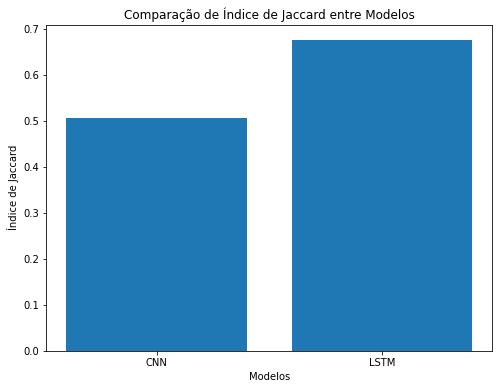

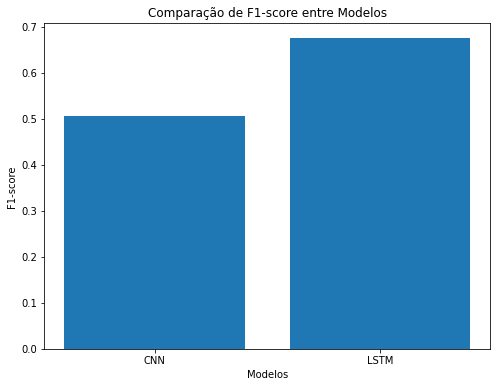

In [6]:
# Definir os nomes dos modelos
nomes_modelos = ['CNN', 'LSTM']

# Definir os valores de índice de Jaccard e F1-score para cada modelo
jaccard_scores = [jaccard_modelo1, jaccard_modelo2]
f1_scores = [f1_score_modelo1, f1_score_modelo2]

# Plotar gráfico de barras para o índice de Jaccard
plt.figure(figsize=(8, 6))
plt.bar(nomes_modelos, jaccard_scores)
plt.xlabel('Modelos')
plt.ylabel('Índice de Jaccard')
plt.title('Comparação de Índice de Jaccard entre Modelos')
plt.show()

# Plotar gráfico de barras para o F1-score
plt.figure(figsize=(8, 6))
plt.bar(nomes_modelos, f1_scores)
plt.xlabel('Modelos')
plt.ylabel('F1-score')
plt.title('Comparação de F1-score entre Modelos')
plt.show()

###Buscar outras metricas para comparaco entre os modelos###

1045/1045 [==============================] - 4s 4ms/step


/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


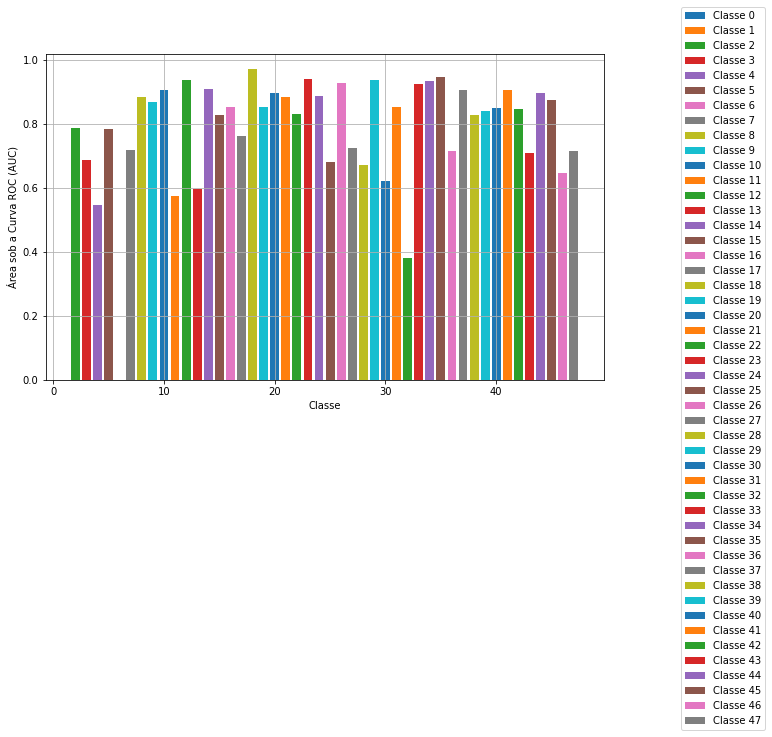

Área sob a Curva ROC (AUC): nan


In [14]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obter as previsões de probabilidade do modelo
y_prob = model.predict(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
fig = plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.bar(i, roc_auc[i], label='Classe {}'.format(i))
plt.xlabel('Classe')
plt.ylabel('Área sob a Curva ROC (AUC)')
plt.grid()
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Calcula a média das áreas sob a curva ROC para todas as classes
valid_auc_values = [roc_auc[i] for i in range(num_classes) if not np.isnan(roc_auc[i])]
mean_auc = np.mean(valid_auc_values)
mean_auc = np.mean(list(roc_auc.values()))
print("Área sob a Curva ROC (AUC):", mean_auc)


1045/1045 [==============================] - 43s 41ms/step


/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/ygor.gazola/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


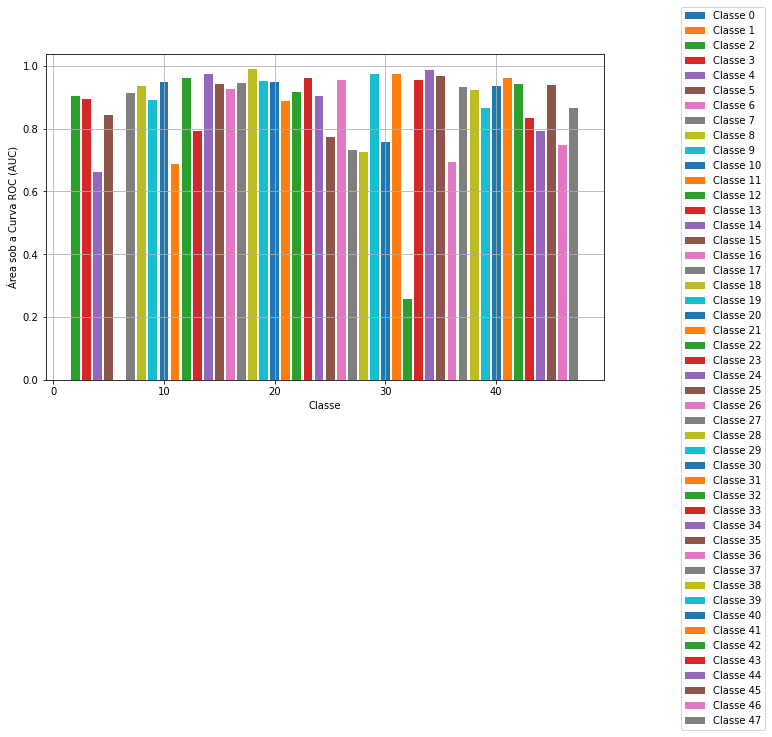

Área sob a Curva ROC (AUC): nan


In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obter as previsões de probabilidade do modelo
y_prob = model_lstm.predict(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
fig = plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.bar(i, roc_auc[i], label='Classe {}'.format(i))
plt.xlabel('Classe')
plt.ylabel('Área sob a Curva ROC (AUC)')
plt.grid()
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Calcula a média das áreas sob a curva ROC para todas as classes
mean_auc = np.mean(list(roc_auc.values()))
print("Área sob a Curva ROC (AUC):", mean_auc)

In [9]:
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score

# Calcular e imprimir a Hamming Loss
hamming_loss_val = hamming_loss(y_test, y_pred_modelo1)
print("Hamming Loss:", hamming_loss_val)

# Calcular e imprimir a Accuracy Score Multilabel
accuracy_score_multilabel = accuracy_score(y_test, y_pred_modelo1)
print("Accuracy Score Multilabel:", accuracy_score_multilabel)

# Calcular e imprimir a Precision Score Multilabel
precision_score_multilabel = precision_score(y_test, y_pred_modelo1, average='micro')
print("Precision Score Multilabel:", precision_score_multilabel)

# Calcular e imprimir a Recall Score Multilabel
recall_score_multilabel = recall_score(y_test, y_pred_modelo1, average='micro')
print("Recall Score Multilabel:", recall_score_multilabel)

# Calcular e imprimir a F1 Score Multilabel
f1_score_multilabel = f1_score(y_test, y_pred_modelo1, average='micro')
print("F1 Score Multilabel:", f1_score_multilabel)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets